<a href="https://colab.research.google.com/github/haynapasi050505/supervised-machine-learning-classification-capstone-project/blob/main/Mobile123_price_prediction_team_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [1]:
#importing important libatraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import seaborn as sns
sns.set()

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file path
dir_path = '/content/drive/MyDrive/data_mobile_price_range.csv'

In [4]:
#reading file
df = pd.read_csv(dir_path)

In [5]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
#checking shape of dataset
df.shape

(2000, 21)

In [7]:
#checking for column names in dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
#info about column names of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
#checking first five rows of dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
#cheacking last five rows of dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [11]:
#checking for any null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
#checking some statistical summary of dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
#removing those rows from screen width wich has value 0
df = df[df['sc_w'] != 0]

In [14]:
df.shape

(1820, 21)

In [15]:
#checking datatype of coulmns
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

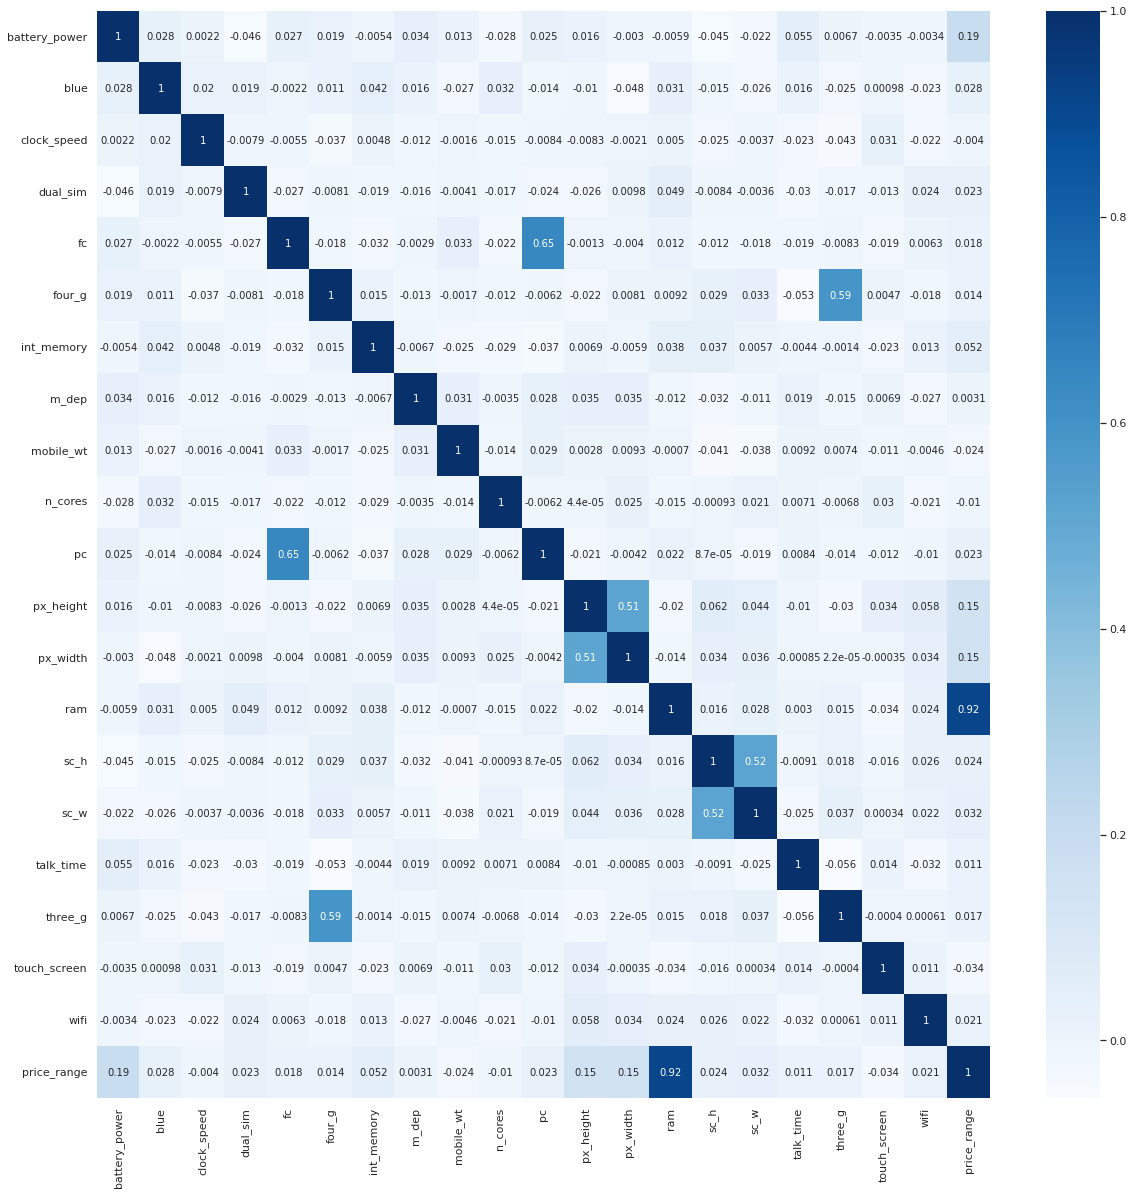

In [16]:
#ploting correlation matrix 
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , cbar = True , annot = True , cmap ='Blues')

Let us visualize the number of elements in each class of mobile phones.

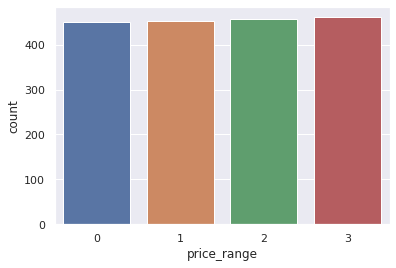

In [17]:
#count plot of price range
sns.countplot(x=df['price_range'])
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

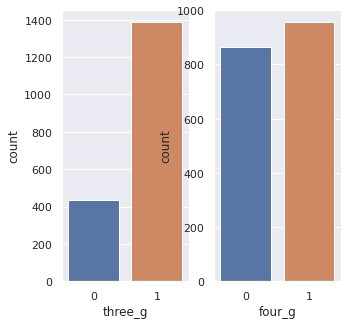

In [18]:
#count plot of 3G and 4G
figure,ax=plt.subplots(nrows=1,ncols=2 , figsize=(5,5))
sns.countplot(x='three_g' , data = df, ax=ax[0])
sns.countplot(x='four_g' , data=df , ax=ax[1])


there is less data points of mobile phones with 3G support

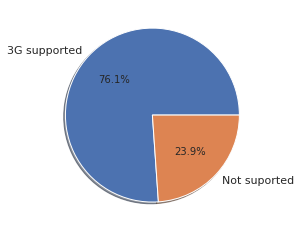

In [19]:
labels=["3G supported" , 'Not suported']
values=df['three_g'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


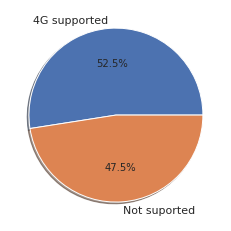

In [20]:
labels=["4G supported" , 'Not suported']
values=df['four_g'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


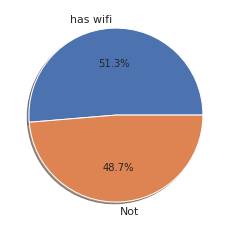

In [21]:
labels=["has wifi" , 'Not']
values=df['wifi'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


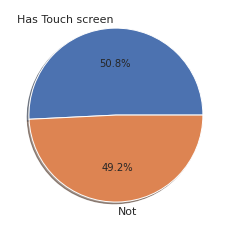

In [22]:
labels=["Has Touch screen" , 'Not']
values=df['touch_screen'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


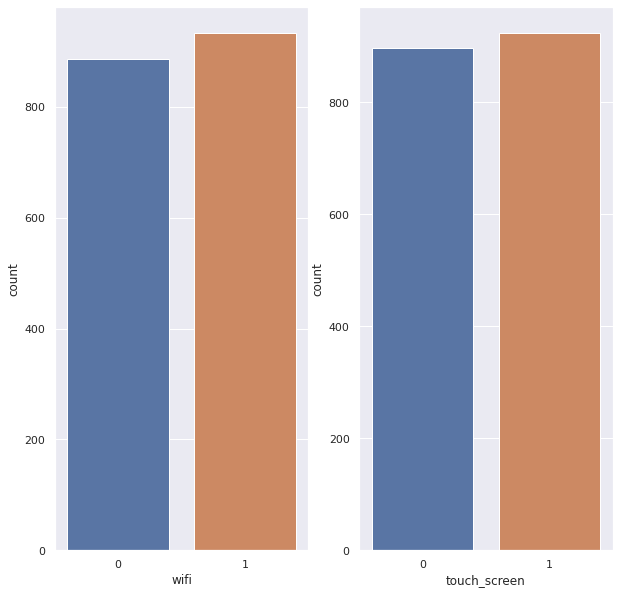

In [23]:
#count plot of wifi and touch screen
figure,ax=plt.subplots(nrows=1,ncols=2 , figsize=(10,10))
sns.countplot(x='wifi' , data = df , ax=ax[0])
sns.countplot(x='touch_screen' , data= df , ax=ax[1])



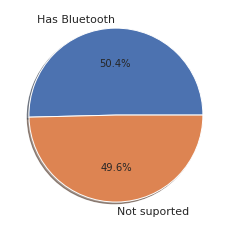

In [24]:
#pie plot for Blutooth
labels=["Has Bluetooth" , 'Not suported']
values=df['blue'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


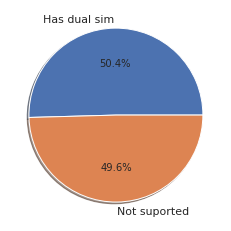

In [25]:
#pie plot of dual sim
labels=["Has dual sim" , 'Not suported']
values=df['dual_sim'].value_counts().values
fig1 , ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%' , shadow='True , strangle=90')
plt.show()


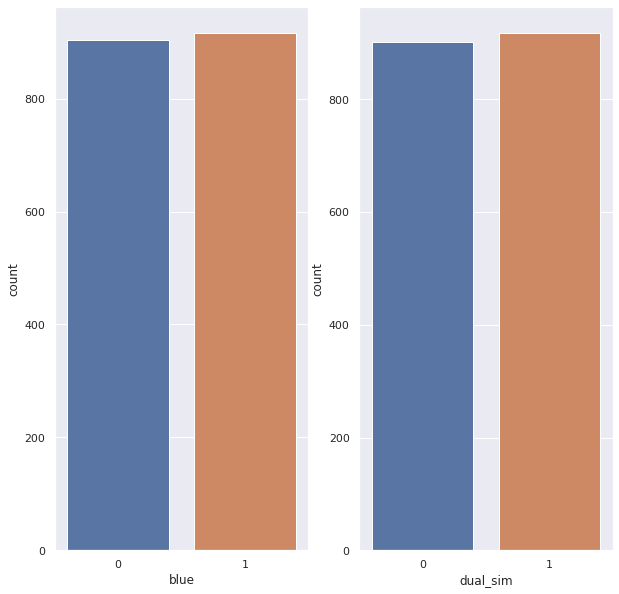

In [26]:
figure,ax=plt.subplots(nrows=1,ncols=2 , figsize=(10,10))
sns.countplot(x='blue' , data = df , ax=ax[0])
sns.countplot(x='dual_sim' , data= df , ax=ax[1])


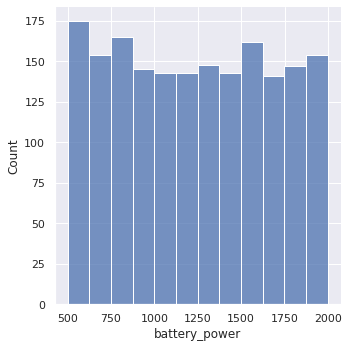

In [27]:
#Distribution plot of battary power
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.displot(data=df['battery_power'])
plt.show()

**Bivariate Analysis**

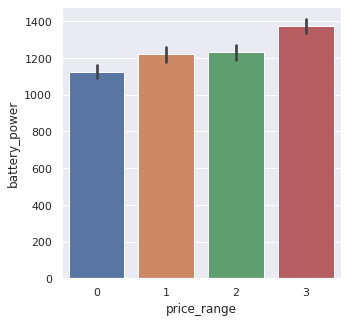

In [28]:
#Bar plot of price range with corresponding battaery power
sns.barplot(x="price_range" , y="battery_power" , data = df)

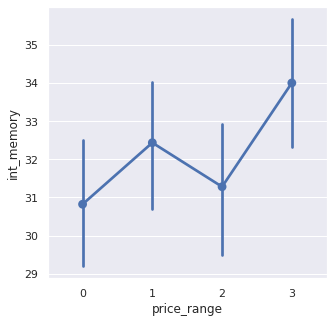

In [29]:
sns.pointplot(x="price_range" , y="int_memory"  ,data = df)

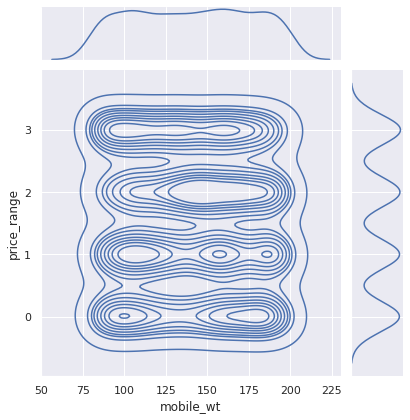

In [30]:
sns.jointplot(x='mobile_wt' , y='price_range' , data=df , kind='kde' )

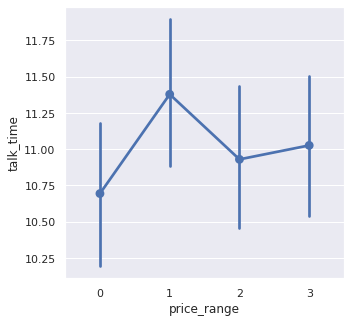

In [31]:
sns.pointplot(y='talk_time' , x='price_range' , data=df)

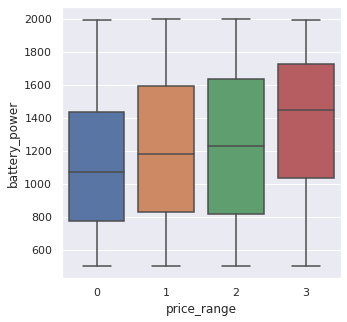

In [32]:
sns.boxplot(x="price_range" , y="battery_power" , data = df)

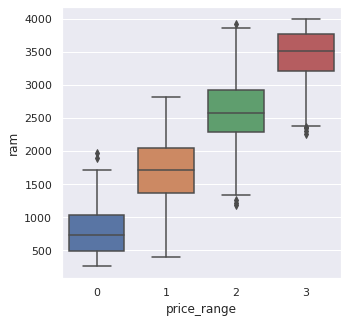

In [33]:
sns.boxplot(y='ram' , x='price_range' , data = df )

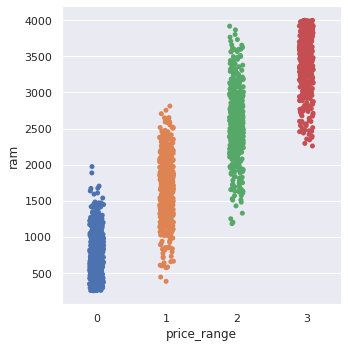

In [34]:
sns.catplot(y='ram' , x='price_range' ,kind='strip' ,data = df )

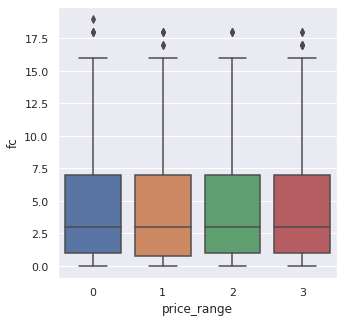

In [35]:
sns.boxplot(y='fc' , x='price_range' , data = df )

Let us see if there are any missing values or missing data.

In [36]:
# Data for all the independent variables
x=df.drop(['price_range'] , axis=1)
# Data for the dependent variable
y=df['price_range']
x.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid = train_test_split(x , y , test_size=0.2 , random_state=7)

Now, we define a function for creating a confusion matrix

In [38]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
def my_confusion_matrix(y_test , y_pred , plt_title):
  cm=confusion_matrix(y_test , y_pred)
  print(classification_report(y_test, y_pred ))
  sns.heatmap(cm , annot=True , fmt='g' , cbar=False , cmap='BuPu')
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')
  plt.show()
  return cm

Now, as the function is defined, we can proceed with implementing the classification algorithms.

**Let us implement the Gaussian NB classifier.**

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [40]:
gnb.fit(x_train , y_train)
y_pred_gnb = gnb.predict(x_valid)

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



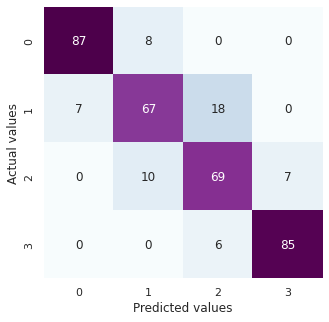

In [41]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid , y_pred_gnb))
cm_rfc = my_confusion_matrix(y_valid , y_pred_gnb , 'Gaussian NB Confusion Matrix')

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3 , leaf_size = 25)


In [44]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_valid)

kNN Classifier Accuracy Score: 0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



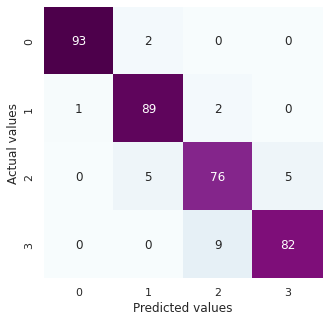

In [45]:
print('kNN Classifier Accuracy Score:' ,accuracy_score(y_valid , y_pred_knn))
cm_rfc = my_confusion_matrix( y_valid , y_pred_knn , 'kNN Confusion Matrix')

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap = True, max_depth = 7 , max_features=15 , min_samples_leaf =3 , min_samples_split = 10,n_estimators = 200 , random_state = 7)

In [47]:
rfc.fit(x_train , y_train)
y_pred_rfc = rfc.predict(x_valid)


Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



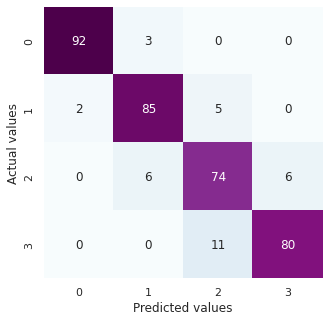

In [48]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid , y_pred_rfc))
cm_rfc = my_confusion_matrix(y_valid , y_pred_rfc , 'Random Forest Confusion Matrix')

In [49]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [50]:
svm_clf.fit(x_train, y_train)
y_pred_svm=svm_clf.predict(x_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



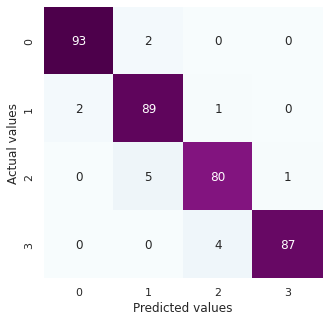

In [51]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')